# Interpolation Exercise 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [3]:
from scipy.interpolate import griddata

## Sparse 2d interpolation

In this example the values of a scalar field $f(x,y)$ are known at a very limited set of points in a square domain:

* The square domain covers the region $x\in[-5,5]$ and $y\in[-5,5]$.
* The values of $f(x,y)$ are zero on the boundary of the square at integer spaced points.
* The value of $f$ is known at a single interior point: $f(0,0)=1.0$.
* The function $f$ is not known at any other points.

Create arrays `x`, `y`, `f`:

* `x` should be a 1d array of the x coordinates on the boundary and the 1 interior point.
* `y` should be a 1d array of the y coordinates on the boundary and the 1 interior point.
* `f` should be a 1d array of the values of f at the corresponding x and y coordinates.

You might find that `np.hstack` is helpful.

In [47]:
# YOUR CODE HERE
x = np.hstack((np.arange(-5, 6), np.full(10, 5), np.arange(-5, 5), np.full(9, -5), [0]))
y = np.hstack((np.full(11, 5), np.arange(-5, 5), np.full(10, -5), np.arange(-4, 5), [0]))
f = np.hstack((np.zeros(40), [1]))
print(x)
print(y)
print(f)

[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  5.  5.  5.  5.  5.  5.  5.
  5.  5.  5. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4. -5. -5. -5. -5. -5.
 -5. -5. -5. -5.  0.]
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5. -5. -4. -3. -2. -1.  0.  1.
  2.  3.  4. -5. -5. -5. -5. -5. -5. -5. -5. -5. -5. -4. -3. -2. -1.  0.
  1.  2.  3.  4.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.]


The following plot should show the points on the boundary and the single point in the interior:

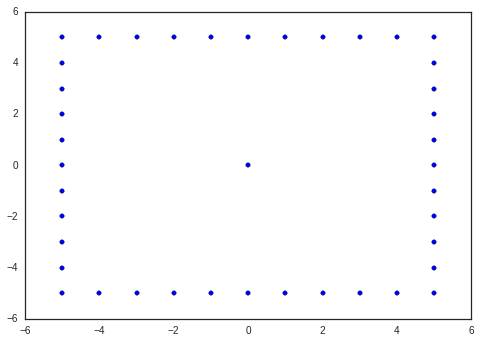

In [48]:
plt.scatter(x, y);

In [49]:
assert x.shape==(41,)
assert y.shape==(41,)
assert f.shape==(41,)
assert np.count_nonzero(f)==1

Use `meshgrid` and `griddata` to interpolate the function $f(x,y)$ on the entire square domain:

* `xnew` and `ynew` should be 1d arrays with 100 points between $[-5,5]$.
* `Xnew` and `Ynew` should be 2d versions of `xnew` and `ynew` created by `meshgrid`.
* `Fnew` should be a 2d array with the interpolated values of $f(x,y)$ at the points (`Xnew`,`Ynew`).
* Use cubic spline interpolation.

In [63]:
# YOUR CODE HERE
xnew = np.linspace(-5, 5, 100)
ynew = np.linspace(-5, 5, 100)

Xnew, Ynew = np.meshgrid(xnew, ynew)

Fnew = griddata((x, y), f, (Xnew, Ynew), method="cubic")

print(Fnew)

[[  0.00000000e+00  -8.25426211e-05  -1.59978295e-04 ...,  -2.60182288e-05
   -1.34242628e-05   0.00000000e+00]
 [ -1.36257165e-05  -6.85323178e-05  -1.14649012e-04 ...,  -5.25652809e-05
   -6.79974089e-05  -8.20718145e-05]
 [ -2.64076453e-05  -5.31305767e-05  -6.91285046e-05 ...,  -6.84168774e-05
   -1.13813698e-04  -1.59064685e-04]
 ..., 
 [ -2.64006600e-05  -4.88164111e-05  -4.68066152e-05 ...,  -4.61867813e-05
   -9.05870749e-05  -1.59045207e-04]
 [ -1.36215617e-05  -6.04583024e-05  -9.13008780e-05 ...,  -4.82442011e-05
   -5.99570667e-05  -8.20602835e-05]
 [  0.00000000e+00  -8.25340238e-05  -1.59963534e-04 ...,  -2.60181607e-05
   -1.34242196e-05   0.00000000e+00]]


In [64]:
assert xnew.shape==(100,)
assert ynew.shape==(100,)
assert Xnew.shape==(100,100)
assert Ynew.shape==(100,100)
assert Fnew.shape==(100,100)

Plot the values of the interpolated scalar field using a contour plot. Customize your plot to make it effective and beautiful.

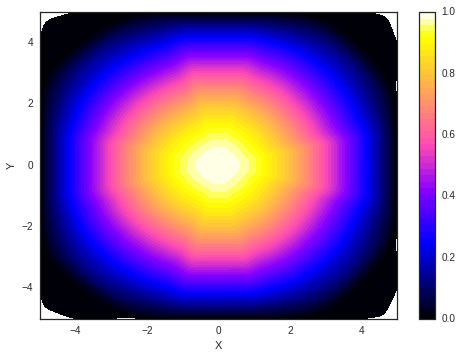

In [74]:
# YOUR CODE HERE
plt.contourf(Xnew, Ynew, Fnew, cmap="gnuplot2", levels=np.linspace(0, 1, 50))
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
assert True # leave this to grade the plot